## Data Loading

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1', names = ['target','ids','date','flag','user','text'])

In [4]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [8]:
df['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

In [9]:
df[df['target']==4]['text']

800000          I LOVE @Health4UandPets u guys r the best!! 
800001     im meeting up with one of my besties tonight! ...
800002     @DaRealSunisaKim Thanks for the Twitter add, S...
800003     Being sick can be really cheap when it hurts t...
800004       @LovesBrooklyn2 he has that effect on everyone 
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, Length: 800000, dtype: object

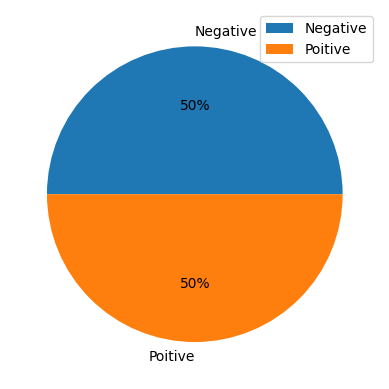

In [10]:
plt.pie(df['target'].value_counts(), labels=['Negative', 'Poitive'], autopct="%1.0f%%")
plt.legend()
plt.show()

In [11]:
data = df[['text','target']]
data.head()

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [12]:
data.shape

(1600000, 2)

In [13]:
data['target'] = data['target'].replace(4,1) # 1 positive sentiment
data['target'].value_counts()

<ipython-input-13-c0b7caa22cd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1) # 1 positive sentiment


target
0    800000
1    800000
Name: count, dtype: int64

In [14]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [15]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [16]:
# Use NLTK's stopwords corpus directly
stopwords_set = set(stopwords.words('english'))
print(stopwords_set)

{'then', 'will', 'mustn', 'out', 'be', 'between', "wasn't", 'above', 'do', "don't", 'himself', 'd', 'how', 'my', "they'd", 'which', 'can', "aren't", 'couldn', 'have', 'too', 'than', "we'll", 'being', "isn't", 'should', "i'll", "needn't", 'few', 'such', 'been', 'by', 'he', 'am', 'having', 'before', 'did', 'doing', "didn't", 'yourself', 'because', 'aren', 'them', 'here', "that'll", 'for', 'hasn', "he'll", "we'd", 'nor', 'of', 'wasn', 'shan', 'our', 'to', 'from', 'who', 'at', 'both', "it'll", 'once', 'or', 'just', "you've", "mustn't", 'has', 'y', 'other', "she's", 'when', 'itself', "i've", 'against', 'their', 'theirs', 'not', 'most', 'don', 'in', "haven't", 'we', 've', 'there', 'while', 'isn', "it'd", 'won', 'all', "i'm", 'it', 'were', 'more', 'same', 'below', 'him', 'on', 'ain', "weren't", "i'd", 'wouldn', 'so', 'was', "he's", 'over', 'an', 'ours', 'each', 't', 'themselves', 'up', 'no', "won't", 'what', "you're", 'own', 'until', 'doesn', 'its', 'she', 'further', 'herself', 're', 'but', '

In [17]:
import re
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
# Initialize stemmer and lemmatizer
ps = PorterStemmer()
lm = WordNetLemmatizer()

In [19]:
def preprocess_text(text):
    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove URLs before tokenization
    text = re.sub(r'http[s]?://\S+|www\.\S+', '', text)

    # 3. Remove numbers
    text = re.sub(r'\d+', '', text)

    # 4. Tokenize the text into words
    words = word_tokenize(text)

    # 5. Remove stopwords
    words = [word for word in words if word not in stopwords_set]

    # 6. Remove punctuation
    words = [word for word in words if word not in string.punctuation]

    # 7. Remove repeating characters (e.g., "soooon" -> "soon")
    words = [re.sub(r'(.)\1+', r'\1', word) for word in words]

    # 8. Apply stemming (e.g., "running" -> "run")
    words = [ps.stem(word) for word in words]
    text = ' '.join(words)
    return text


In [20]:
data['text'][0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [21]:
preprocess_text(data['text'][0])

"switchfot aw 's bumer shoulda got david car third day"

In [22]:
data['text'] = data['text'].apply(preprocess_text)

<ipython-input-22-07219129f017>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(preprocess_text)


In [23]:
data['text'][0]

"switchfot aw 's bumer shoulda got david car third day"

In [24]:
data.head()

,text,target
0,switchfot aw 's bumer shoulda got david car th...,0
1,upset ca n't updat facebok text . might cri re...,0
2,kenichan dive mani time bal manag save rest go...,0
3,whole bodi fel itchi like fire,0
4,nationwidecla 's behav 'm mad ca n't se,0


In [25]:
data_neg = data[data['target']==0]
data_neg

,text,target
0,switchfot aw 's bumer shoulda got david car th...,0
1,upset ca n't updat facebok text . might cri re...,0
2,kenichan dive mani time bal manag save rest go...,0
3,whole bodi fel itchi like fire,0
4,nationwidecla 's behav 'm mad ca n't se,0
...,...,...
799995,sick spend day lay bed listen taylorswift,0
799996,gmail,0
799997,rest peac farah sad,0
799998,eric_urban sound like rival flage ad much though,0


In [50]:
data_pos = data[data['target']==1]
data_pos

,text,target
800000,love healthuandpet u guy r best,1
800001,im mete one besti tonight cant wait girl talk,1
800002,darealsunisakim thank twiter ad sunisa got met...,1
800003,sick reali cheap hurt much eat real fod plu fr...,1
800004,lovesbroklyn efect everyon,1
...,...,...
1599995,woke schol best fele ever,1
1599996,thewdb.com col hear old walt interview â «,1
1599997,readi mojo makeov ask detail,1
1599998,hapi th birthday bo al time tupac amaru shakur,1


In [27]:
from wordcloud import WordCloud

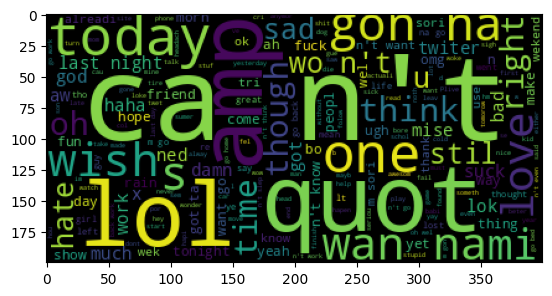

In [28]:
wc_neg = WordCloud()
wc_neg.generate(' '.join(data_neg['text']))
plt.imshow(wc_neg)

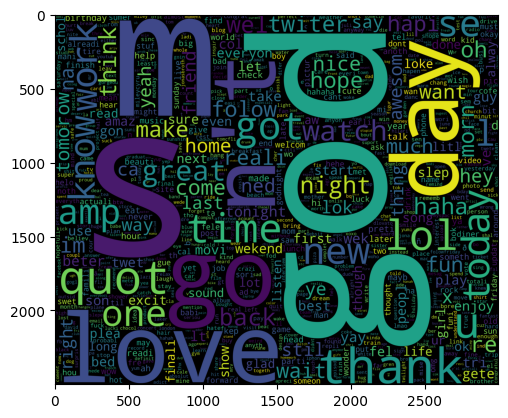

In [51]:
wc_pos = WordCloud(max_words = 1000 , width = 3000 , height = 2500,
               collocations=False)
wc_pos.generate(' '.join(data_pos['text']))
plt.imshow(wc_pos)

In [93]:
new_df = pd.concat([data_neg[:15000], data_pos[:15000]])
new_df.shape

(30000, 2)

## Model Building

In [94]:
X = new_df['text']
y = new_df['target']

In [95]:
new_df['target'].value_counts()

target
0    15000
1    15000
Name: count, dtype: int64

In [96]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((24000,), (6000,), (24000,), (6000,))

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [99]:
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
tfidf.fit(x_train)
print('No. of feature_words: ', len(tfidf.get_feature_names_out()))

No. of feature_words:  5000


In [100]:
x_train = tfidf.transform(x_train)
x_test  = tfidf.transform(x_test)
print(x_train.shape)
print(x_test.shape)

(24000, 5000)
(6000, 5000)


In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, classification_report

In [102]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), 
          GradientBoostingClassifier(), XGBClassifier(), SVC()]

In [103]:
models_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 
                'Gradient Boosting', 'XGBoost', 'SVM']

In [106]:
def model_fit_and_results(model, model_name, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    results = {
        'Model': model_name,
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'F1 Score - Class 0': f1_score(y_test, y_test_pred, average=None)[0],
        'F1 Score - Class 1': f1_score(y_test, y_test_pred, average=None)[1],
        'Precision - Class 0': precision_score(y_test, y_test_pred, average=None)[0],
        'Precision - Class 1': precision_score(y_test, y_test_pred, average=None)[1],
        'Recall - Class 0': recall_score(y_test, y_test_pred, average=None)[0],
        'Recall - Class 1': recall_score(y_test, y_test_pred, average=None)[1]
    }
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"{model_name}\n {results}\n")
    print(classification_report(y_test, y_test_pred))
    return results, cm

In [107]:
results_list=[]
cm_list=[]
for i in range(len(models)):
    result, cm = model_fit_and_results(models[i], models_names[i], x_train, x_test, y_train, y_test)
    results_list.append(result)
    cm_list.append(cm)

Logistic Regression
 {'Model': 'Logistic Regression', 'Train Accuracy': 0.8073333333333333, 'Test Accuracy': 0.7483333333333333, 'F1 Score - Class 0': 0.7475760615178869, 'F1 Score - Class 1': 0.7490860751080093, 'Precision - Class 0': 0.7620995228357191, 'Precision - Class 1': 0.7351598173515982, 'Recall - Class 0': 0.7335958005249343, 'Recall - Class 1': 0.763550135501355}

              precision    recall  f1-score   support

           0       0.76      0.73      0.75      3048
           1       0.74      0.76      0.75      2952

    accuracy                           0.75      6000
   macro avg       0.75      0.75      0.75      6000
weighted avg       0.75      0.75      0.75      6000

Decision Tree
 {'Model': 'Decision Tree', 'Train Accuracy': 0.9895833333333334, 'Test Accuracy': 0.6776666666666666, 'F1 Score - Class 0': 0.6770207080828323, 'F1 Score - Class 1': 0.6783100465735197, 'Precision - Class 0': 0.6894557823129251, 'Precision - Class 1': 0.6663398692810457, 'Recall

## Results Visualization

In [108]:
results_df = pd.DataFrame(results_list)
results_df

,Model,Train Accuracy,Test Accuracy,F1 Score - Class 0,F1 Score - Class 1,Precision - Class 0,Precision - Class 1,Recall - Class 0,Recall - Class 1
0,Logistic Regression,0.807333,0.748333,0.747576,0.749086,0.762100,0.735160,0.733596,0.763550
1,Decision Tree,0.989583,0.677667,0.677021,0.678310,0.689456,0.666340,0.665026,0.690718
2,Random Forest,0.989583,0.730000,0.729097,0.730897,0.743520,0.717080,0.715223,0.745257
3,Gradient Boosting,0.700167,0.683833,0.622036,0.728262,0.791984,0.630926,0.512139,0.861111
4,XGBoost,0.783833,0.716167,0.691541,0.737151,0.771937,0.677063,0.626312,0.808943
5,SVM,0.937625,0.747167,0.743793,0.750452,0.766446,0.729453,0.722441,0.772696


In [109]:
train_labels = [round(score,2) for score in results_df['Train Accuracy']]
test_labels = [round(score,2) for score in results_df['Test Accuracy']]

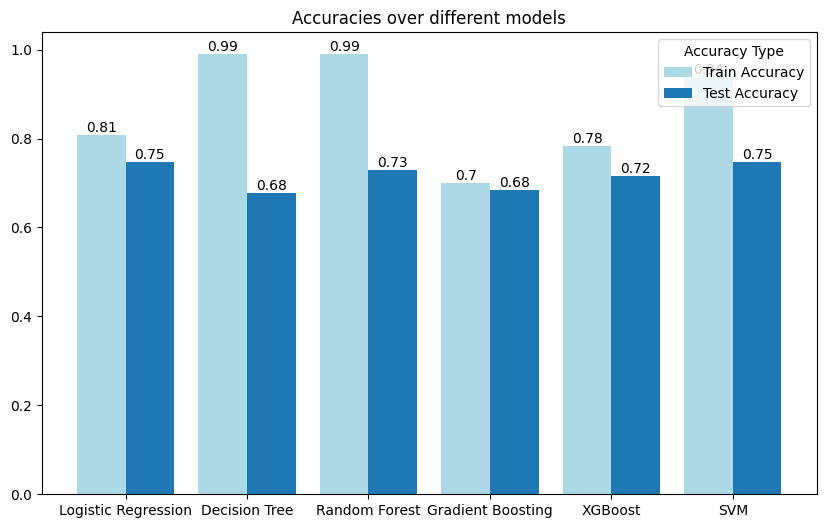

In [110]:
w_bar=0.4
plt.figure(figsize=(10,6))
plt.title('Accuracies over different models')
bar1 = np.arange(len(results_df['Model']))
bar2 = [i+w_bar for i in bar1]
bars_train = plt.bar(data=results_df, x=bar1, height='Train Accuracy', width=w_bar, color='lightblue')
bars_test = plt.bar(data=results_df, x=bar2, height='Test Accuracy', width=w_bar)
plt.bar_label(bars_train, labels=train_labels)
plt.bar_label(bars_test, labels=test_labels)
plt.xticks(bar1+w_bar/2,models_names)
plt.legend(handles=[bars_train, bars_test], title='Accuracy Type', labels=['Train Accuracy', 'Test Accuracy'])
plt.show()

In [111]:
f1_score_0_labels = [round(score,2) for score in results_df['F1 Score - Class 0']]
f1_score_1_labels = [round(score,2) for score in results_df['F1 Score - Class 1']]
precision_0_labels = [round(score,2) for score in results_df['Precision - Class 0']]
precision_1_labels = [round(score,2) for score in results_df['Precision - Class 1']]
recall_0_labels = [round(score,2) for score in results_df['Recall - Class 0']]
recall_1_labels = [round(score,2) for score in results_df['Recall - Class 1']]

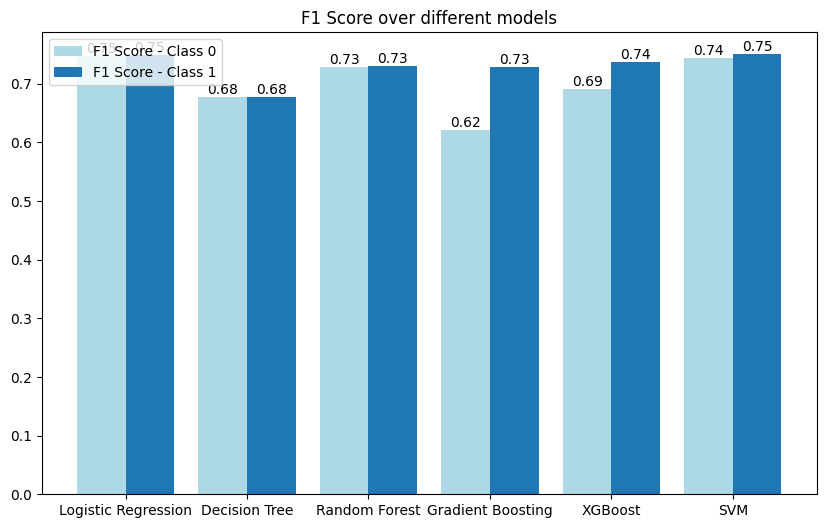

In [112]:
w_bar=0.4
plt.figure(figsize=(10,6))
plt.title('F1 Score over different models')
bar1 = np.arange(len(results_df['Model']))
bar2 = [i+w_bar for i in bar1]
bars_0 = plt.bar(data=results_df, x=bar1, height='F1 Score - Class 0', width=w_bar, color='lightblue')
bars_1 = plt.bar(data=results_df, x=bar2, height='F1 Score - Class 1', width=w_bar)
plt.bar_label(bars_0, labels=f1_score_0_labels)
plt.bar_label(bars_1, labels=f1_score_1_labels)
plt.xticks(bar1+w_bar/2,models_names)
plt.legend(handles=[bars_0, bars_1], labels=['F1 Score - Class 0', 'F1 Score - Class 1'])
plt.show()

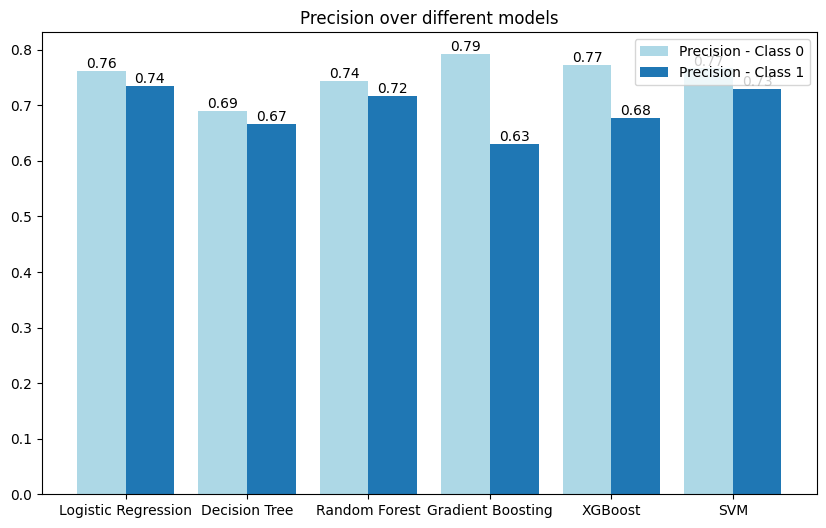

In [113]:
w_bar=0.4
plt.figure(figsize=(10,6))
plt.title('Precision over different models')
bar1 = np.arange(len(results_df['Model']))
bar2 = [i+w_bar for i in bar1]
bars_0 = plt.bar(data=results_df, x=bar1, height='Precision - Class 0', width=w_bar, color='lightblue')
bars_1 = plt.bar(data=results_df, x=bar2, height='Precision - Class 1', width=w_bar)
plt.bar_label(bars_0, labels=precision_0_labels)
plt.bar_label(bars_1, labels=precision_1_labels)
plt.xticks(bar1+w_bar/2,models_names)
plt.legend(handles=[bars_0, bars_1], labels=['Precision - Class 0', 'Precision - Class 1'])
plt.show()

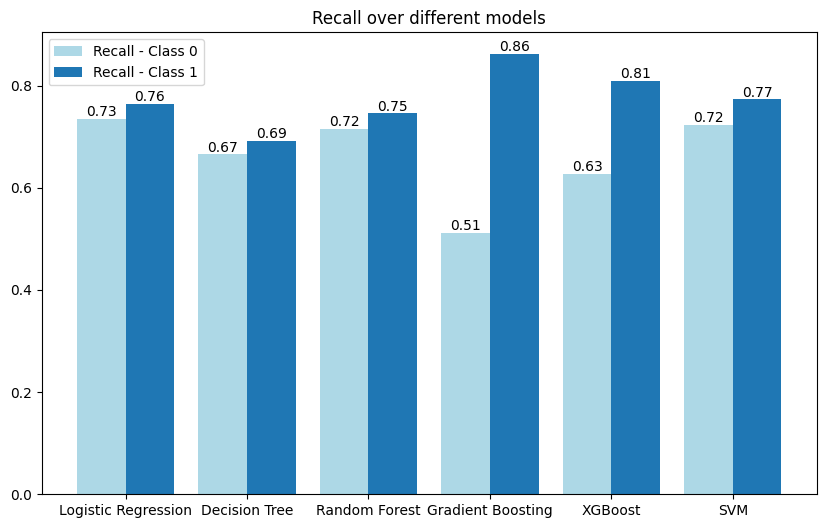

In [114]:
w_bar=0.4
plt.figure(figsize=(10,6))
plt.title('Recall over different models')
bar1 = np.arange(len(results_df['Model']))
bar2 = [i+w_bar for i in bar1]
bars_0 = plt.bar(data=results_df, x=bar1, height='Recall - Class 0', width=w_bar, color='lightblue')
bars_1 = plt.bar(data=results_df, x=bar2, height='Recall - Class 1', width=w_bar)
plt.bar_label(bars_0, labels=recall_0_labels)
plt.bar_label(bars_1, labels=recall_1_labels)
plt.xticks(bar1+w_bar/2,models_names)
plt.legend(handles=[bars_0, bars_1], labels=['Recall - Class 0', 'Recall - Class 1'])
plt.show()

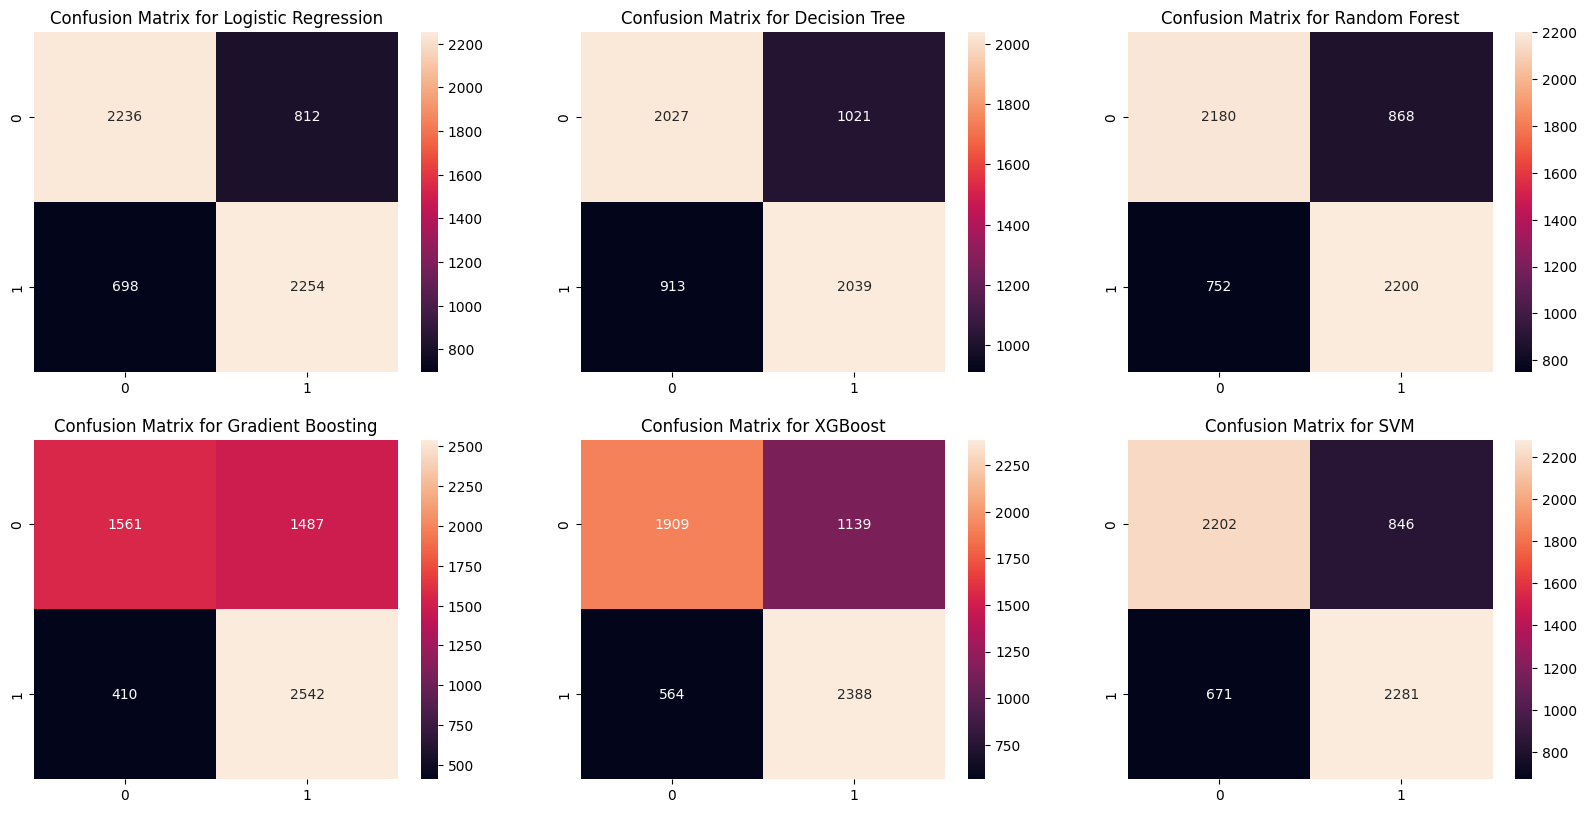

In [115]:
plt.figure(figsize=(20,15))
for i in range(len(cm_list)):
    plt.subplot(3,3,i+1)
    plt.title(f"Confusion Matrix for {models_names[i]}")
    sns.heatmap(cm_list[i], annot=True, fmt='0.0f')
plt.show()